In [111]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
directory = "../pfmdData/data_041522/"
z_gt = 1.875*100 # ground truth
# path = 'rotator_brightness_126.csv'

# Initialize and plot absolute error

<IPython.core.display.Javascript object>


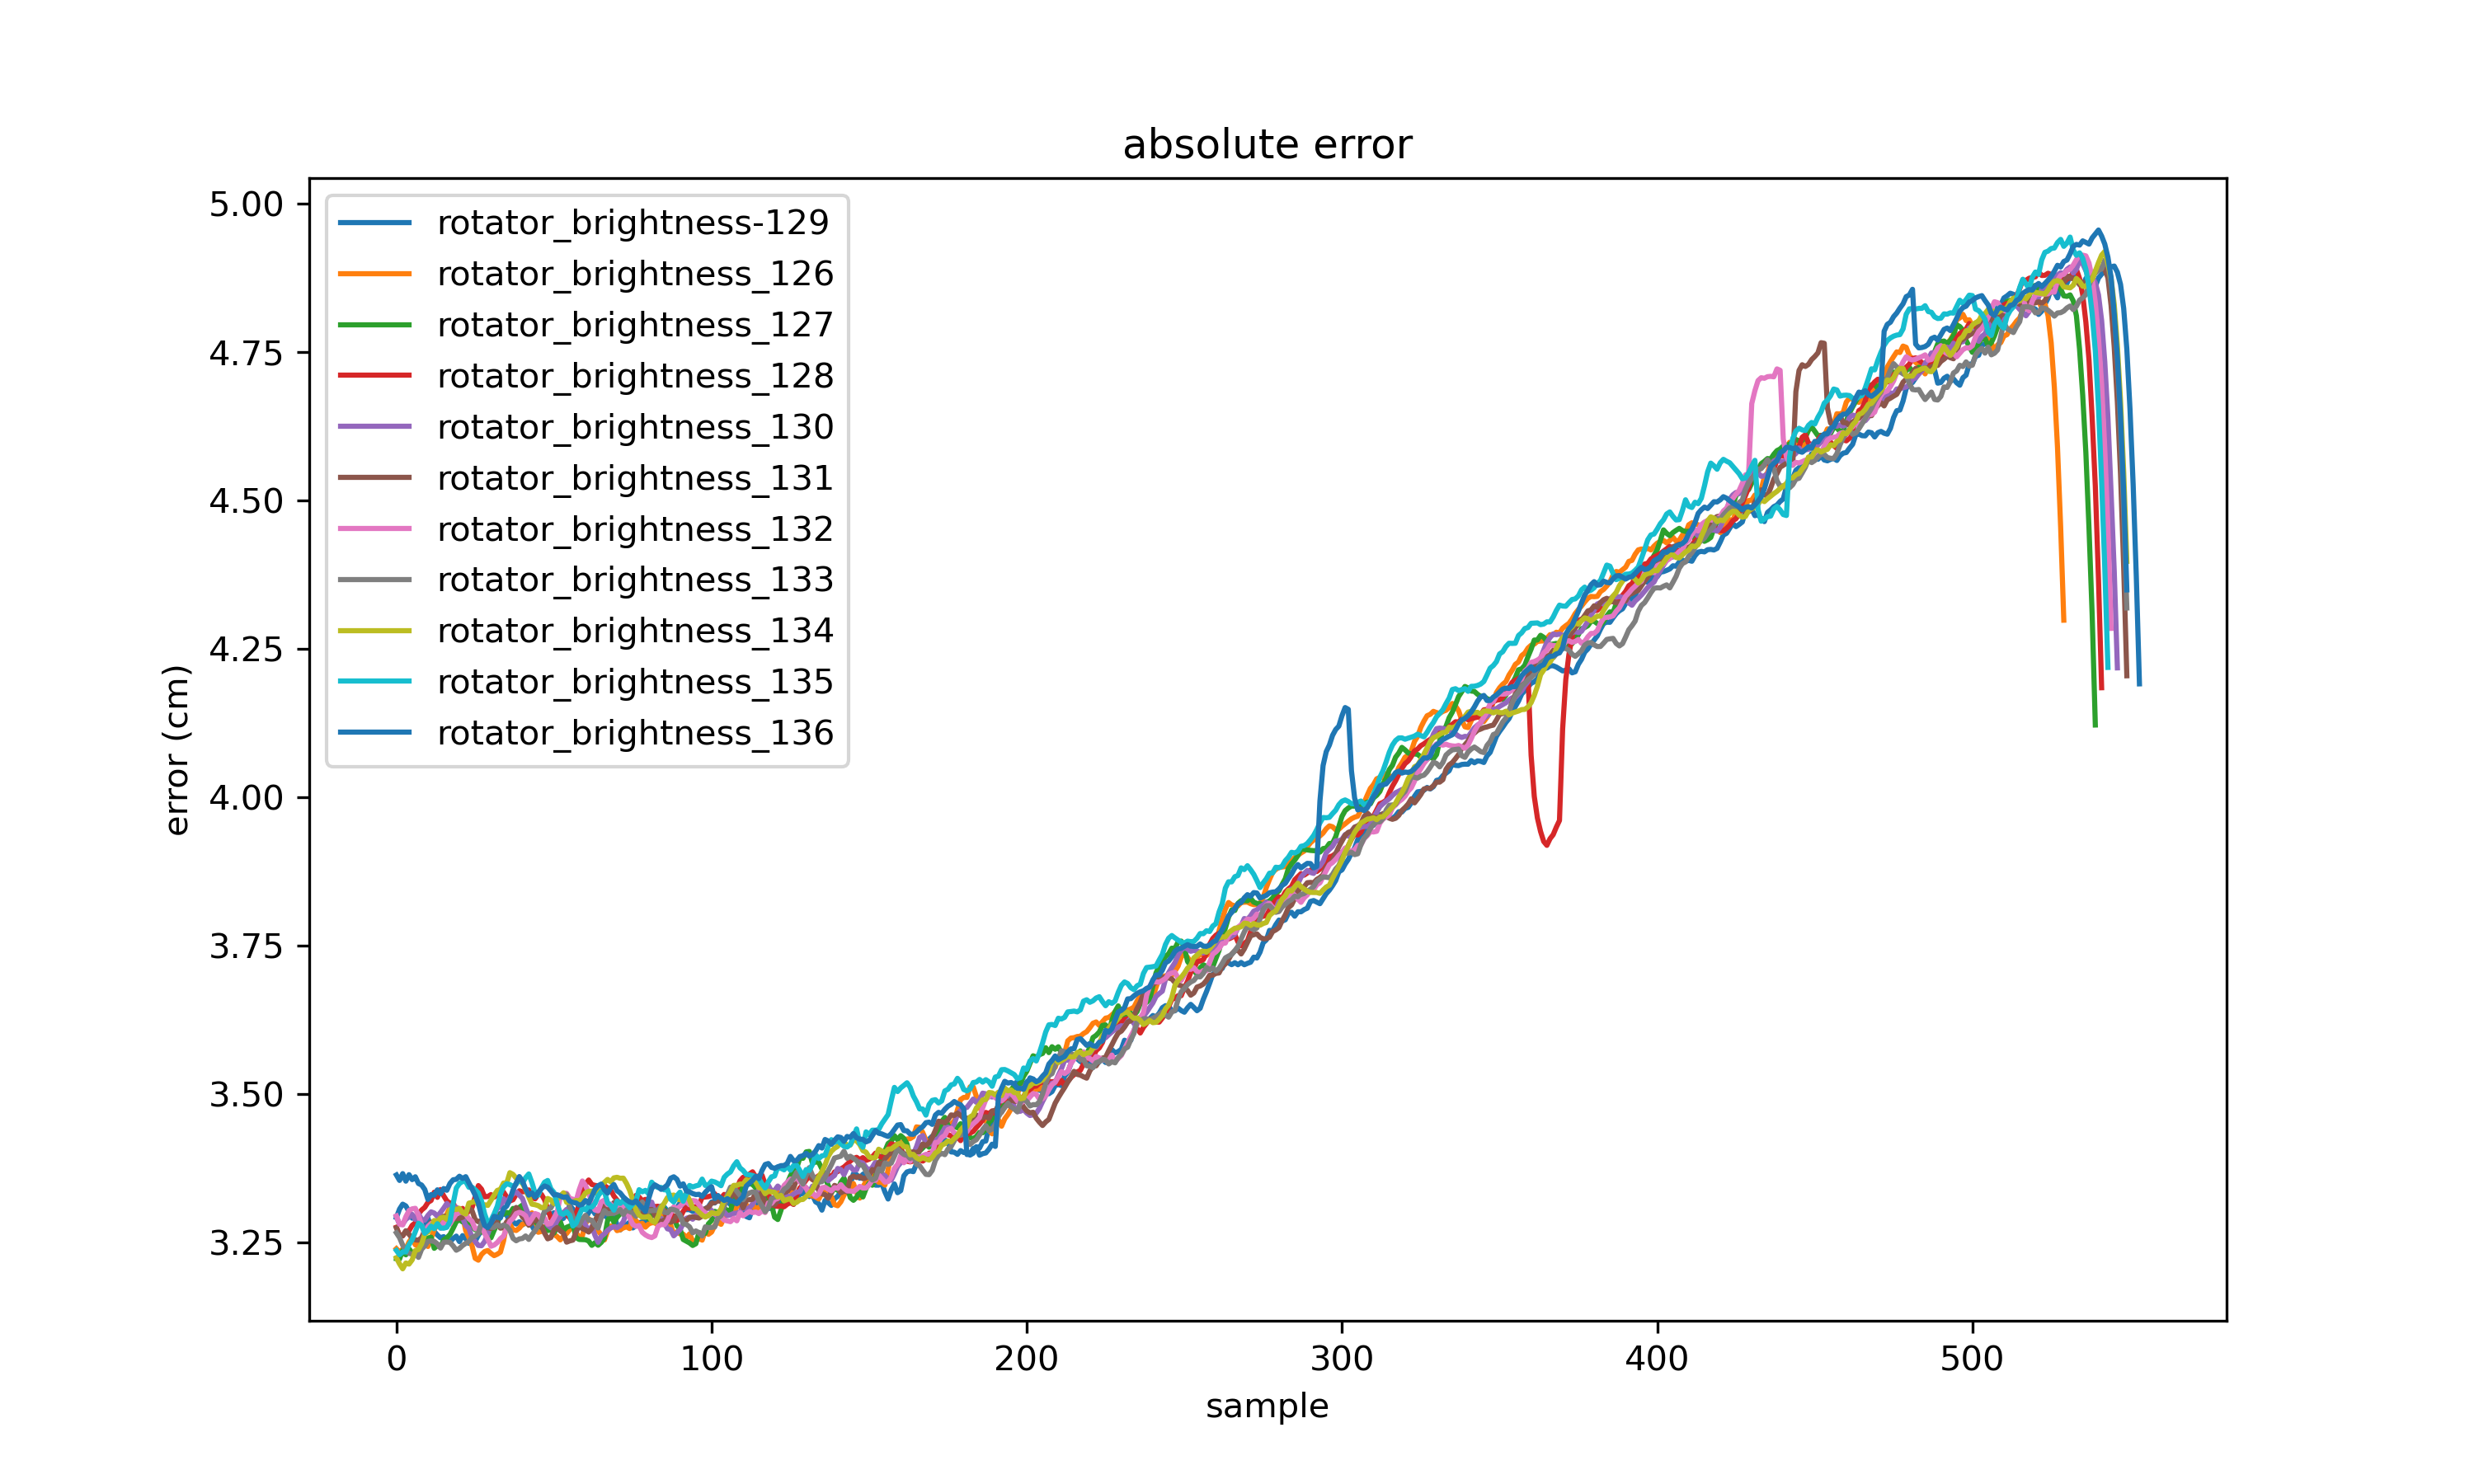

In [104]:
# fig = plt.figure()
x_data = []
y_data = []
z_data = []
plt.figure(figsize=(10, 6), dpi=100)
labels = []
# plt.yscale('log')
for path in os.listdir(directory):
    legend = path[0:22] 
    labels.append(legend)
#     print(legend)
    curr = pd.read_csv(directory + path)
    # data points in all direction
    x = curr['x_cm']
    y = curr['y_cm']
    z = curr['z_cm']
    # errors
    z_error = abs(z - z_gt)
    # calculate rmse
    rmse = (((curr["z_cm"] - z_gt)**2).mean())**(1/2)
    # save data points in a list (data points are saved in this variable as list)
    x_data.append(x) 
    y_data.append(y) 
    z_data.append(z) 
    # plot
    z_error.plot(label = legend)


plt.legend()
plt.title("absolute error")
plt.ylabel("error (cm)")
plt.xlabel("sample")
plt.show()




# Plot in 3D 

<IPython.core.display.Javascript object>


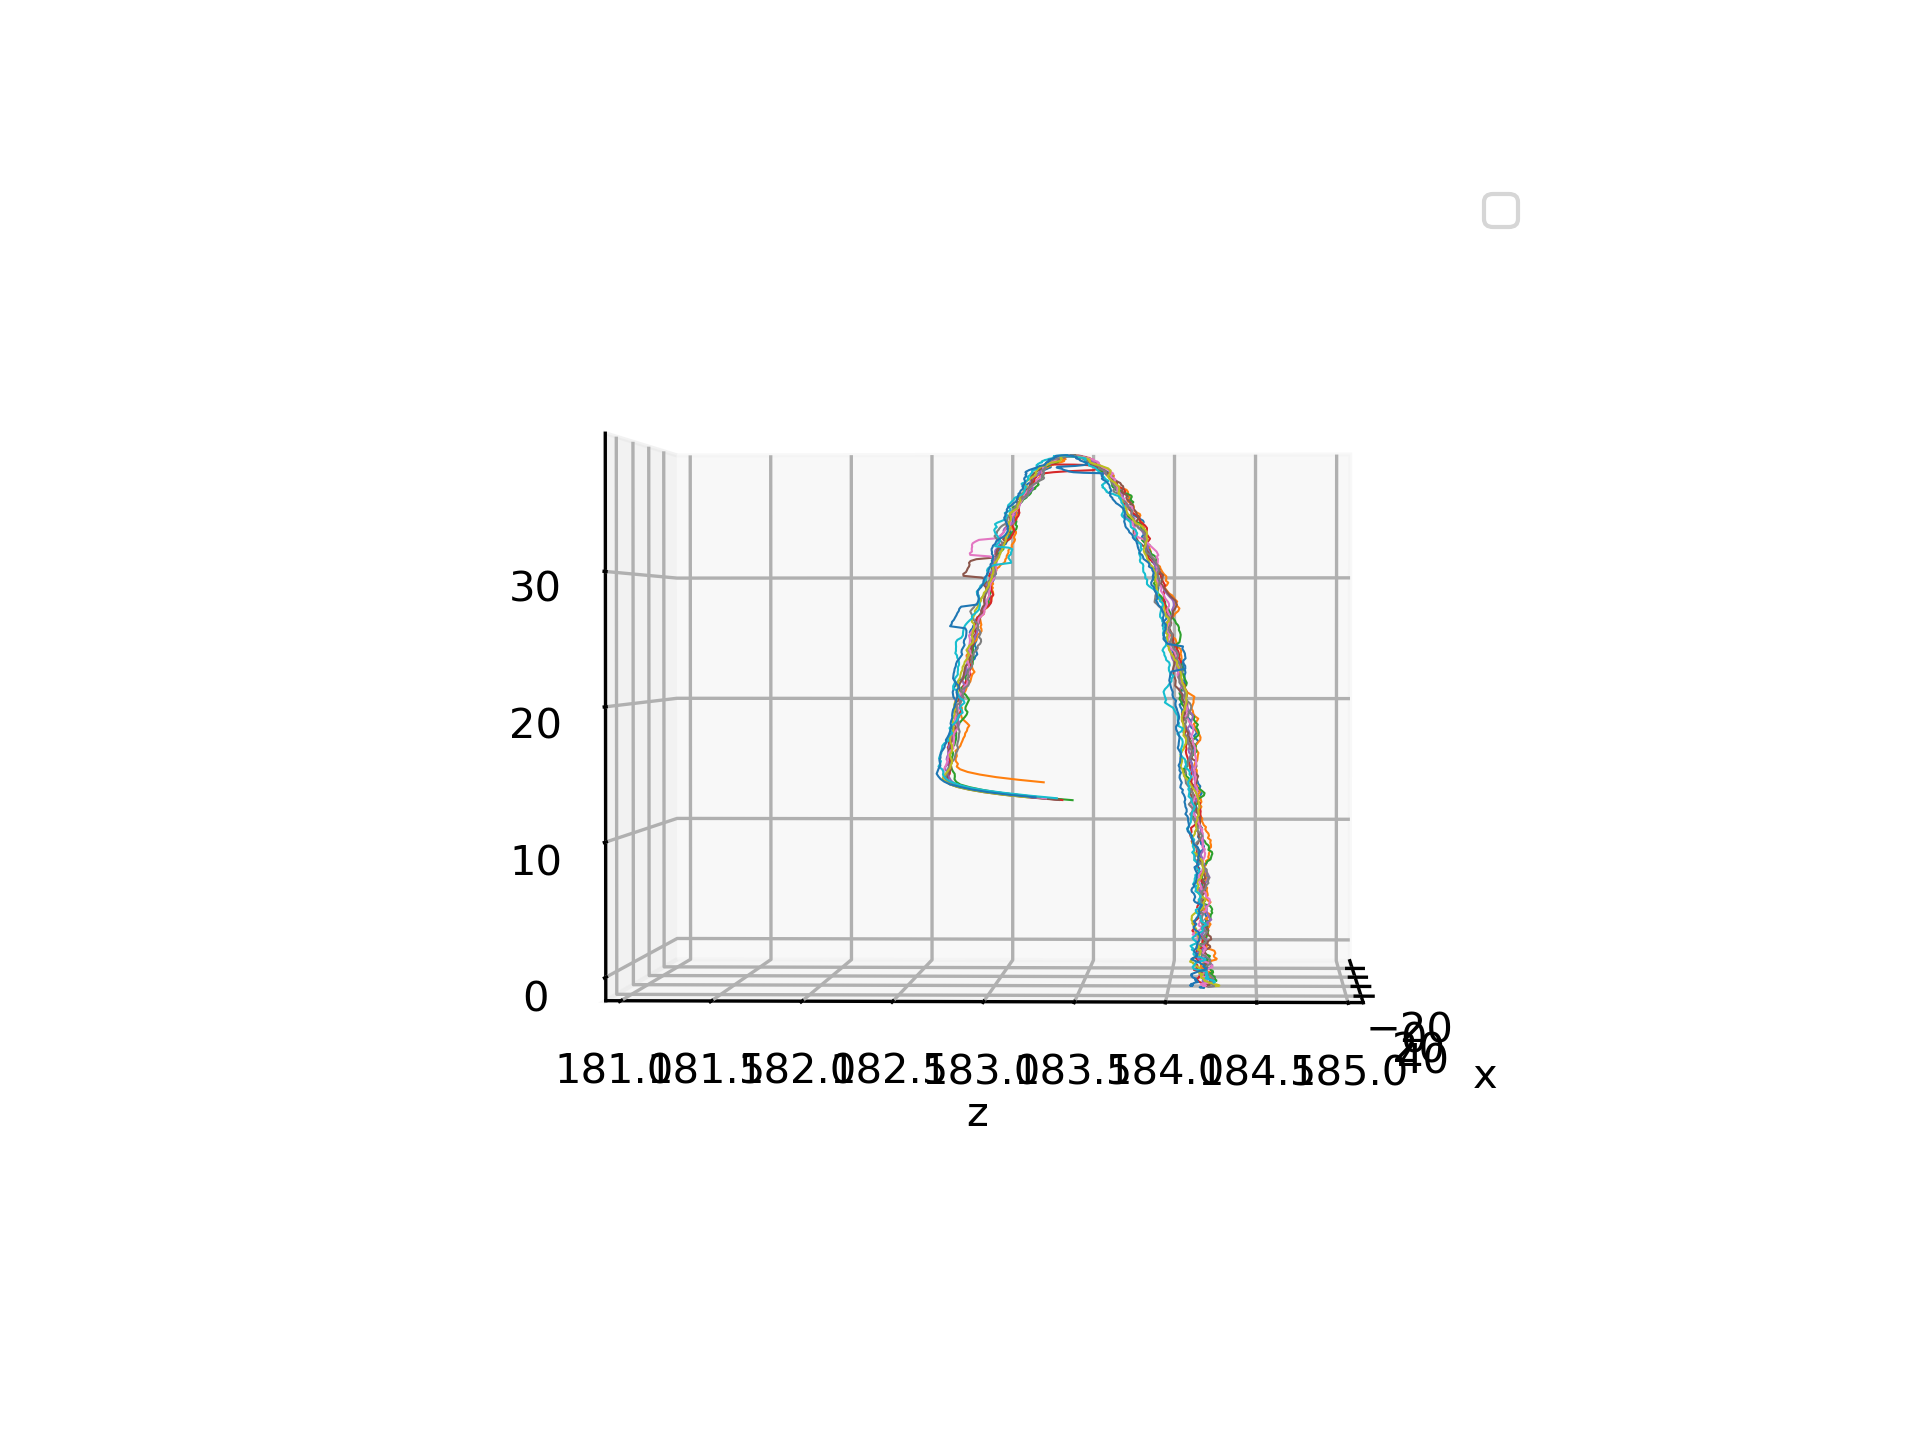

No handles with labels found to put in legend.


In [66]:
%matplotlib notebook

plt.figure(dpi=100)
ax = plt.axes(projection='3d')
for n in range(len(x_data)):
    ax.plot3D(x_data[n], z_data[n], y_data[n], linewidth=0.5)




plt.legend()
plt.xlabel("x")
plt.ylabel("z")
plt.ylim(181,185)
# plt.zlabel("z")
plt.ioff()





# Histogram for z error

### individual histograms

<IPython.core.display.Javascript object>


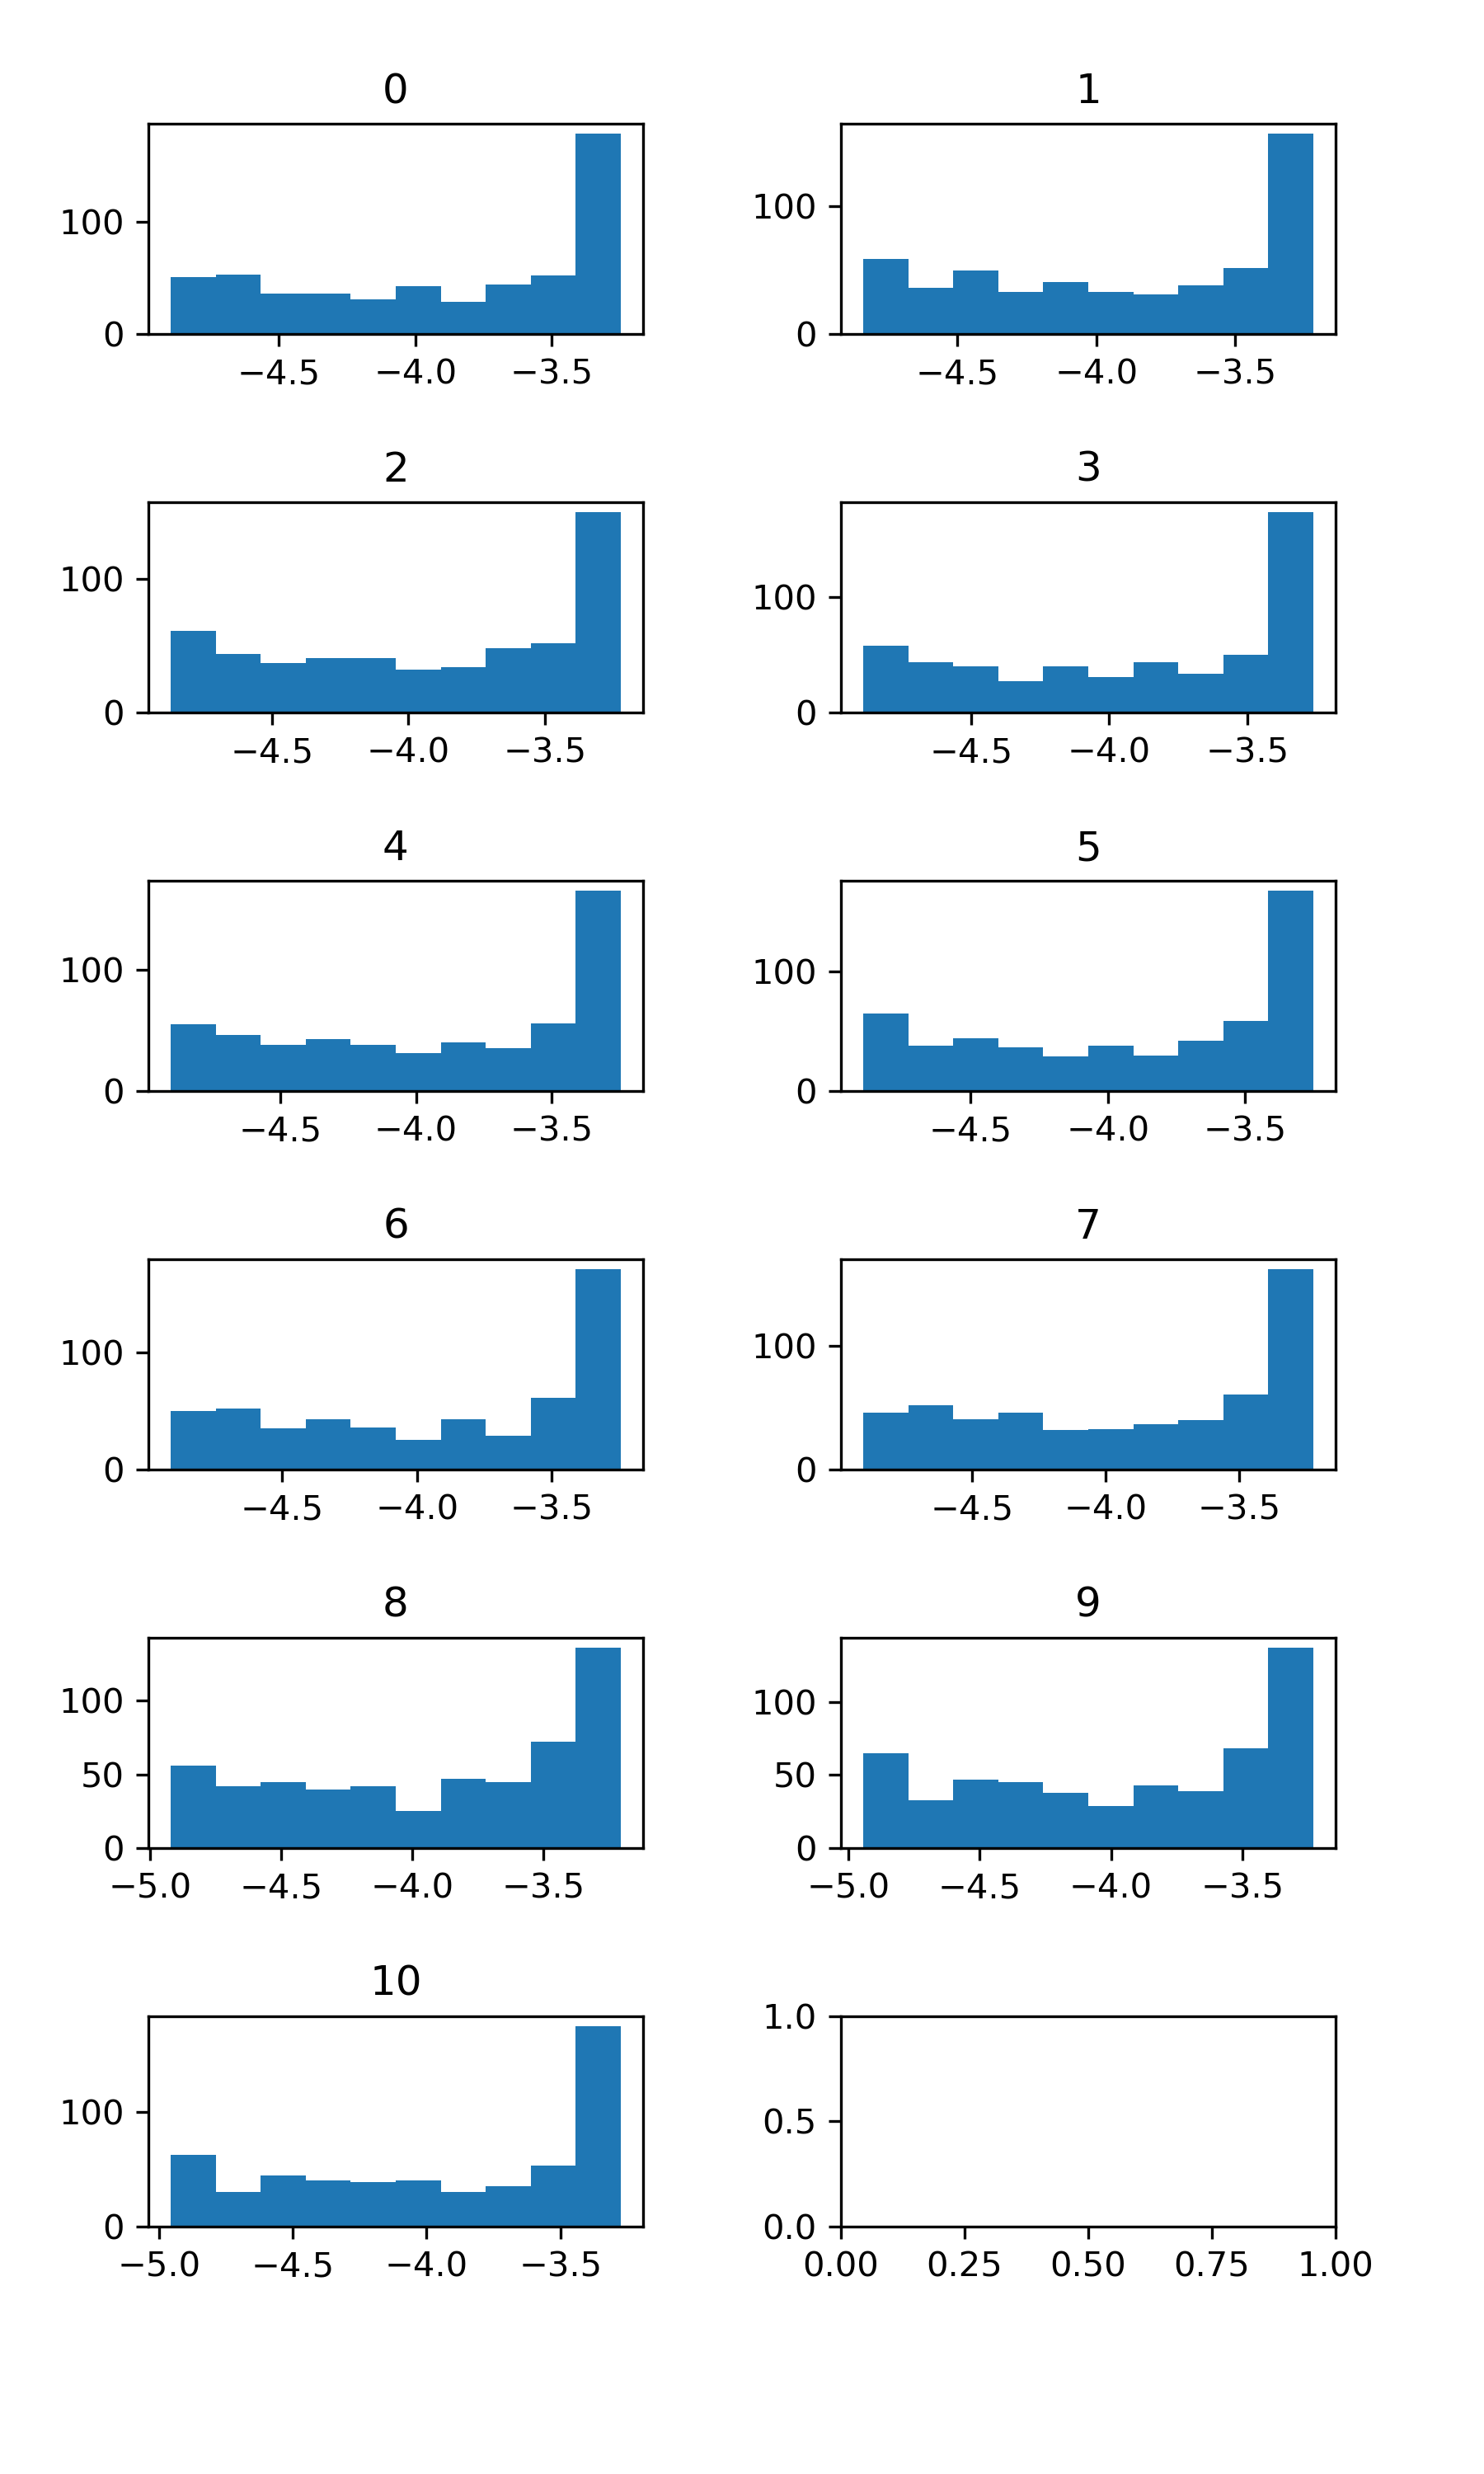

In [91]:

fig, axs = plt.subplots(track_num//2+1, 2, figsize=(6,10), dpi =100)
# set the spacing between subplots
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.95, wspace=0.4, hspace=0.8)
track_num = len(x_data)

for n in range(len(x_data)):

    error = z_data[n] - z_gt
    axs[n//2, n%2].hist(error)
    axs[n//2, n%2].set_title(str(n))
fig.show()

### Stacked bar chart

In [106]:
labels

['rotator_brightness-129',
 'rotator_brightness_126',
 'rotator_brightness_127',
 'rotator_brightness_128',
 'rotator_brightness_130',
 'rotator_brightness_131',
 'rotator_brightness_132',
 'rotator_brightness_133',
 'rotator_brightness_134',
 'rotator_brightness_135',
 'rotator_brightness_136']

In [125]:
labels[0][-3::]


'129'

<IPython.core.display.Javascript object>


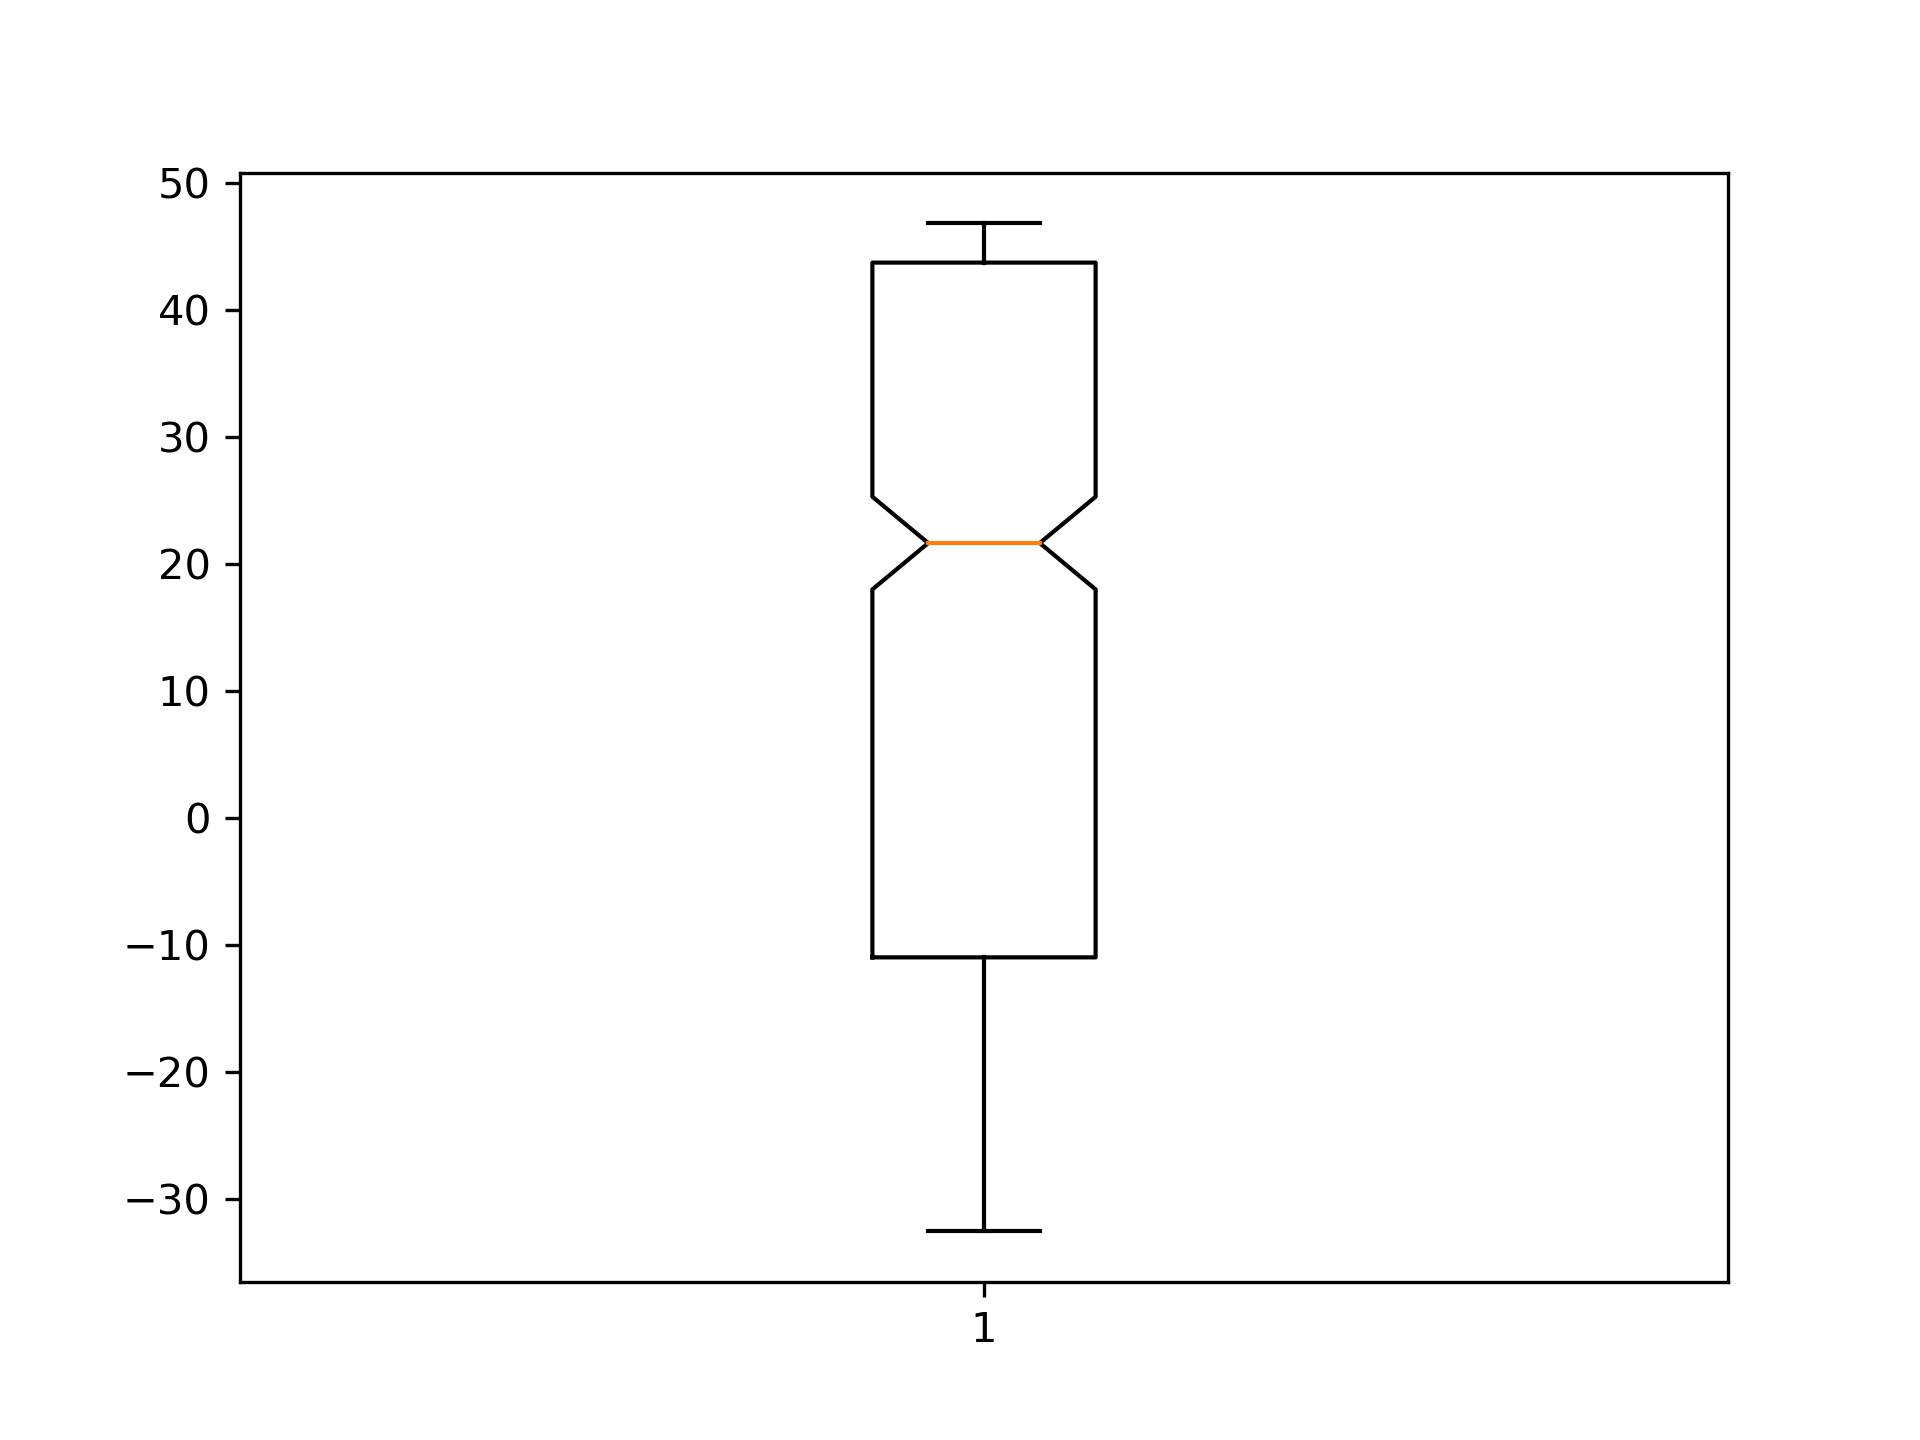

In [132]:
track_num = len(x_data)
fig, ax = plt.subplots()
z_error_mean = []
z_error_std = []
new_labels = []
for n in range(len(x_data)):
    new_labels.append(labels[n][-3::])
    error = z_data[n] - z_gt
    z_error_mean.append(error.mean())
    z_error_std.append(error.std())

ax.boxplot(x_data[0], 0.3)


fig.show()
# fig.legend()
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()